In [1]:
#Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Import tables
answersTable = pd.read_csv("r_answers.csv")
questionsTable = pd.read_csv("r_questions.csv")

C:\Users\baren\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
answersTable.loc[answersTable[" ParentId"]==95007]

,Id,OwnerUserId,CreationDate,LastActivityDate,Score,ParentId,CommentCount
9,95598,1179,2008-09-18T18:49:09.870,2008-09-18T18:49:09.870,5,95007,0
726,1463249,79513,2009-09-22T23:58:43.997,2009-09-23T14:44:04.720,54,95007,7


In [4]:
list(questionsTable.columns.values)

['Id',
 ' OwnerUserId',
 ' CreationDate',
 ' LastActivityDate',
 ' Score',
 ' AcceptedAnswerId',
 ' AnswerCount',
 ' CommentCount',
 ' ViewCount',
 ' FavoriteCount',
 'Unnamed: 10']

In [5]:
questionsTable.head()


,Id,OwnerUserId,CreationDate,LastActivityDate,Score,AcceptedAnswerId,AnswerCount,CommentCount,ViewCount,FavoriteCount,Unnamed: 10
0,77434,14008,2008-09-16T21:40:29.927,2017-06-17T22:25:14.770,194,0,11,3,196567,40,NaN
1,79709,0,2008-09-17T03:39:16.913,2016-04-28T13:21:33.607,5,0,7,2,830,3,NaN
2,95007,15842,2008-09-18T17:59:19.583,2009-09-23T14:44:04.720,60,1463249,2,0,25874,21,NaN
3,102056,0,2008-09-19T14:03:25.997,2014-07-10T18:16:29.313,121,0,21,2,11060,53,NaN
4,103312,0,2008-09-19T16:09:26.053,2015-04-23T05:16:26.967,5,0,2,0,3402,0,NaN


In [6]:
#Idea is : each time a user answers, update his score of accepted vs ansered questions

In [7]:
answersTable=answersTable.sort_values([' OwnerUserId',' CreationDate']) #order by user
questionsTable=questionsTable.sort_values([' OwnerUserId',' CreationDate']) #order by user

In [8]:
accepted=pd.match(answersTable["Id"].tolist(),questionsTable[' AcceptedAnswerId'])

C:\Users\baren\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.match() is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


In [9]:
answersTable["AcceptedAnswer"]=accepted
answersTable['AcceptedAnswer'] = np.where(answersTable['AcceptedAnswer'] == -1,0, answersTable['AcceptedAnswer'])
answersTable['AcceptedAnswer'] = np.where(answersTable['AcceptedAnswer'] != 0,1, answersTable['AcceptedAnswer'])
 

In [129]:
answersTable.head(-25)

,Id,OwnerUserId,CreationDate,LastActivityDate,Score,ParentId,CommentCount,AcceptedAnswer,CumSumAccepted,CumSumQuestions,ProbAccAnswer,FirstActivity
3,79788,0,2008-09-17 03:51:30.190,2008-09-17T03:51:30.190,4,79709,0,0,0,1,0.000000,True
8,86804,0,2008-09-17 19:39:37.370,2008-09-17T19:39:37.370,1,79709,0,0,0,2,0.000000,False
41,476928,0,2009-01-25 00:05:19.107,2009-01-26T03:22:01.867,19,476726,0,0,0,3,0.000000,False
44,501926,0,2009-02-02 00:42:27.250,2009-02-02T00:42:27.250,6,501917,0,0,0,4,0.000000,False
62,612573,0,2009-03-04 21:41:41.980,2009-03-04T21:41:41.980,8,596819,1,0,0,5,0.000000,False
85,750852,0,2009-04-15 08:58:03.103,2009-04-15T09:14:06.747,-1,750786,1,0,0,6,0.000000,False
98,823251,0,2009-05-05 03:50:25.733,2009-05-05T03:50:25.733,8,750786,1,0,0,7,0.000000,False
104,876778,0,2009-05-18 08:56:02.270,2009-05-18T09:48:20.650,2,876711,0,0,0,8,0.000000,False
113,969680,0,2009-06-09 12:03:40.747,2013-06-08T13:44:20.033,114,750786,4,1,1,9,0.111111,False
135,1116218,0,2009-07-12 15:18:02.497,2009-07-12T18:40:27.267,4,1114699,1,0,1,10,0.100000,False


In [11]:
#Compute cumulative sum of accepted answers so far.
answersTable['CumSumAccepted'] = answersTable.groupby(' OwnerUserId')['AcceptedAnswer'].cumsum()

In [12]:
#Compute number of questions answered so far.
answersTable['CumSumQuestions'] = answersTable.groupby(' OwnerUserId').cumcount() + 1

In [13]:
#Compute prob of accepted answer
answersTable['ProbAccAnswer'] = answersTable['CumSumAccepted']/answersTable['CumSumQuestions']

In [14]:
answersTable

,Id,OwnerUserId,CreationDate,LastActivityDate,Score,ParentId,CommentCount,AcceptedAnswer,CumSumAccepted,CumSumQuestions,ProbAccAnswer
3,79788,0,2008-09-17T03:51:30.190,2008-09-17T03:51:30.190,4,79709,0,0,0,1,0.000000
8,86804,0,2008-09-17T19:39:37.370,2008-09-17T19:39:37.370,1,79709,0,0,0,2,0.000000
41,476928,0,2009-01-25T00:05:19.107,2009-01-26T03:22:01.867,19,476726,0,0,0,3,0.000000
44,501926,0,2009-02-02T00:42:27.250,2009-02-02T00:42:27.250,6,501917,0,0,0,4,0.000000
62,612573,0,2009-03-04T21:41:41.980,2009-03-04T21:41:41.980,8,596819,1,0,0,5,0.000000
85,750852,0,2009-04-15T08:58:03.103,2009-04-15T09:14:06.747,-1,750786,1,0,0,6,0.000000
98,823251,0,2009-05-05T03:50:25.733,2009-05-05T03:50:25.733,8,750786,1,0,0,7,0.000000
104,876778,0,2009-05-18T08:56:02.270,2009-05-18T09:48:20.650,2,876711,0,0,0,8,0.000000
113,969680,0,2009-06-09T12:03:40.747,2013-06-08T13:44:20.033,114,750786,4,1,1,9,0.111111
135,1116218,0,2009-07-12T15:18:02.497,2009-07-12T18:40:27.267,4,1114699,1,0,1,10,0.100000


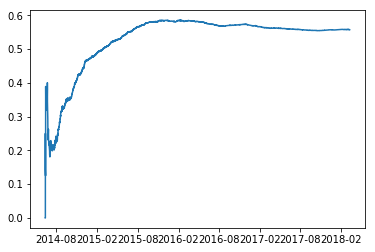

In [63]:
answersTable.loc[answersTable[ "CumSumQuestions"].idxmax()]
user = 3732271 
plt.figure()
plt.plot(answersTable.loc[answersTable[" OwnerUserId"]==user][" CreationDate"].tolist(),answersTable.loc[answersTable[" OwnerUserId"]==user]["ProbAccAnswer"].tolist())
plt.show()

In [22]:
#Normalization: 0 should correspond to time of first activity and 1 to present date. 
#1 converting creation date to proper time format
answersTable[' CreationDate']=pd.to_datetime(answersTable[' CreationDate'])
questionsTable[' CreationDate']=pd.to_datetime(questionsTable[' CreationDate'])
#2 create relativeTime
#2.1 identify the first activity of users

    

In [23]:
answersTable["FirstActivity"]=~answersTable[" OwnerUserId"].duplicated()
questionsTable["FirstActivity"]=~questionsTable[" OwnerUserId"].duplicated()

In [24]:
firstAnswers=answersTable.loc[answersTable["FirstActivity"]==True][[" OwnerUserId"," CreationDate"]]
firstQuestions = questionsTable.loc[questionsTable["FirstActivity"]==True][[" OwnerUserId"," CreationDate"]]

In [29]:
firstActTable=firstQuestions.merge(firstAnswers, left_on=" OwnerUserId", right_on=" OwnerUserId", how='outer')
firstActTable.columns = [" OwnerUserId","FirstQuestion","FirstAnswer"]

In [30]:
firstActTable["FirstActivity"]=firstActTable[["FirstQuestion","FirstAnswer"]].min(axis=1)

In [207]:
summaryTableProbAccAnswer = answersTable[["Id"," OwnerUserId"," CreationDate"," ParentId","ProbAccAnswer"]]
summaryTableProbAccAnswer=summaryTableProbAccAnswer.merge(firstActTable,left_on = " OwnerUserId",right_on=" OwnerUserId")

In [208]:
summaryTableProbAccAnswer["Present"]= max(summaryTableProbAccAnswer[" CreationDate"])
summaryTableProbAccAnswer["DifferenceNumerator"]=(summaryTableProbAccAnswer[" CreationDate"]-summaryTableProbAccAnswer["FirstActivity"])
summaryTableProbAccAnswer["DifferenceDenominator"]=(summaryTableProbAccAnswer["Present"]-summaryTableProbAccAnswer["FirstActivity"])

In [209]:
summaryTableProbAccAnswer.DifferenceNumerator=summaryTableProbAccAnswer.DifferenceNumerator.dt.days
summaryTableProbAccAnswer.DifferenceDenominator=summaryTableProbAccAnswer.DifferenceDenominator.dt.days
summaryTableProbAccAnswer["NormTime"]=summaryTableProbAccAnswer["DifferenceNumerator"]/summaryTableProbAccAnswer["DifferenceDenominator"]

In [ ]:
#Remove users who have less than 5 answers
nrQuestionsperUser = answersTable[" OwnerUserId"].value_counts()
#summaryTableProbAccAnswer.loc[summaryTableProbAccAnswer[""]]
lessthan5users=nrQuestionsperUser[nrQuestionsperUser<5].index
summaryTableProbAccAnswer=summaryTableProbAccAnswer.loc[~summaryTableProbAccAnswer[" OwnerUserId"].isin(lessthan5users)]
len(lessthan5users) # 27339 users were removed, so only around 5000 users stay.

In [211]:
#Add 0 to time 0 and prolong score to 1
usersWhoHaveZero=list(set(summaryTableProbAccAnswer[" OwnerUserId"][summaryTableProbAccAnswer["NormTime"]==0].tolist())) # around 3000
usersArtificialZero = list(set(summaryTableProbAccAnswer[" OwnerUserId"][~summaryTableProbAccAnswer[" OwnerUserId"].isin(usersWhoHaveZero)].tolist()))
tempdfArtificialZero = pd.DataFrame(0, index=np.arange(len(usersArtificialZero)), columns=list(summaryTableProbAccAnswer.columns.values))
tempdfArtificialZero[" OwnerUserId"]=usersArtificialZero
tempdfArtificialZero[" OwnerUserId"]=tempdfArtificialZero[" OwnerUserId"].astype(np.int64)
summaryTableProbAccAnswer = summaryTableProbAccAnswer.append(tempdfArtificialZero, ignore_index=True)

#reorder again
summaryTableProbAccAnswer=summaryTableProbAccAnswer.sort_values([' OwnerUserId','NormTime']) #order by user
summaryTableProbAccAnswer

,Id,OwnerUserId,CreationDate,ParentId,ProbAccAnswer,FirstQuestion,FirstAnswer,FirstActivity,Present,DifferenceNumerator,DifferenceDenominator,NormTime
0,79788,0,2008-09-17 03:51:30.190000,79709,0.000000,2008-09-17 03:39:16.913000,2008-09-17 03:51:30.190000,2008-09-17 03:39:16.913000,2018-03-11 04:17:25.483000,0,3462,0.000000
1,86804,0,2008-09-17 19:39:37.370000,79709,0.000000,2008-09-17 03:39:16.913000,2008-09-17 03:51:30.190000,2008-09-17 03:39:16.913000,2018-03-11 04:17:25.483000,0,3462,0.000000
2,476928,0,2009-01-25 00:05:19.107000,476726,0.000000,2008-09-17 03:39:16.913000,2008-09-17 03:51:30.190000,2008-09-17 03:39:16.913000,2018-03-11 04:17:25.483000,129,3462,0.037262
3,501926,0,2009-02-02 00:42:27.250000,501917,0.000000,2008-09-17 03:39:16.913000,2008-09-17 03:51:30.190000,2008-09-17 03:39:16.913000,2018-03-11 04:17:25.483000,137,3462,0.039573
4,612573,0,2009-03-04 21:41:41.980000,596819,0.000000,2008-09-17 03:39:16.913000,2008-09-17 03:51:30.190000,2008-09-17 03:39:16.913000,2018-03-11 04:17:25.483000,168,3462,0.048527
5,750852,0,2009-04-15 08:58:03.103000,750786,0.000000,2008-09-17 03:39:16.913000,2008-09-17 03:51:30.190000,2008-09-17 03:39:16.913000,2018-03-11 04:17:25.483000,210,3462,0.060659
6,823251,0,2009-05-05 03:50:25.733000,750786,0.000000,2008-09-17 03:39:16.913000,2008-09-17 03:51:30.190000,2008-09-17 03:39:16.913000,2018-03-11 04:17:25.483000,230,3462,0.066436
7,876778,0,2009-05-18 08:56:02.270000,876711,0.000000,2008-09-17 03:39:16.913000,2008-09-17 03:51:30.190000,2008-09-17 03:39:16.913000,2018-03-11 04:17:25.483000,243,3462,0.070191
8,969680,0,2009-06-09 12:03:40.747000,750786,0.111111,2008-09-17 03:39:16.913000,2008-09-17 03:51:30.190000,2008-09-17 03:39:16.913000,2018-03-11 04:17:25.483000,265,3462,0.076545
9,1116218,0,2009-07-12 15:18:02.497000,1114699,0.100000,2008-09-17 03:39:16.913000,2008-09-17 03:51:30.190000,2008-09-17 03:39:16.913000,2018-03-11 04:17:25.483000,298,3462,0.086077


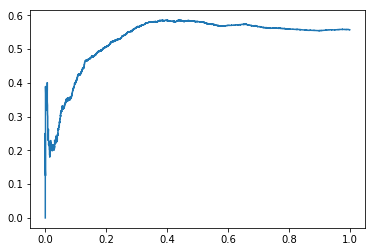

In [229]:
#Example
user = 3732271
plt.figure()
plt.plot(summaryTableProbAccAnswer.loc[summaryTableProbAccAnswer[" OwnerUserId"]==user]["NormTime"].tolist(),summaryTableProbAccAnswer.loc[summaryTableProbAccAnswer[" OwnerUserId"]==user]["ProbAccAnswer"].tolist())
plt.show()

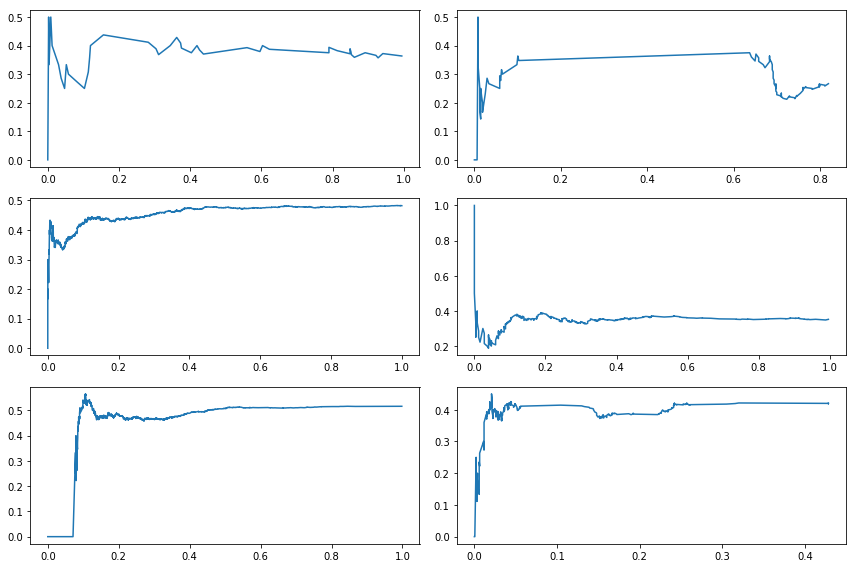

In [230]:
#Now  let's look at some random users
import random
r_users=summaryTableProbAccAnswer.loc[np.random.choice(summaryTableProbAccAnswer.index, 6)][" OwnerUserId"].tolist()
plt.figure(figsize=(12,8))

for i in range(0,6):
    user=r_users[i]
    plt.subplot(3,2,i+1)
    plt.plot(summaryTableProbAccAnswer.loc[summaryTableProbAccAnswer[" OwnerUserId"]==user]["NormTime"].tolist(),summaryTableProbAccAnswer.loc[summaryTableProbAccAnswer[" OwnerUserId"]==user]["ProbAccAnswer"].tolist())
    plt.tight_layout()

plt.show()